# Meghanjali Chennupati (U30308400)

## 1. Create 5 28x28 pixel images of the first letter of your first name to be used for training. For instance, if the first character of your name is K, then create 5 versions of K and save these as 5 different 28x28 images.


Answer:  I have created 5 versions of my First letter images . My first letter is M. I created with 28 x 28 pixel images. I saved with Media1, media 2, media 3, media 4, media 5 in jpg format.

## 2. Create a notebook. Load the MNIST dataset (see the tutorial from class) and the supplied autencoder (digits.a5). Display the predictions for several random digits and compare these to the original. 

# Load the libraries

In [2]:
import numpy as np

# Loading the MNIST data set and normalizing the data set 

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


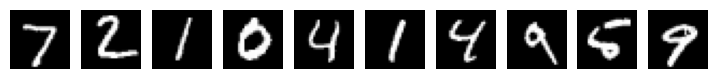

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Creating the autoencoder model

In [5]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

# Train the autoencoder model.

In [6]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 19s 37ms/step - loss: 0.1917 - val_loss: 0.1314
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1220 - val_loss: 0.1137
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1111 - val_loss: 0.1065
Epoch 4/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1053 - val_loss: 0.1029
Epoch 5/10
469/469 [==============================] - 17s 35ms/step - loss: 0.1020 - val_loss: 0.1004
Epoch 6/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0997 - val_loss: 0.0986
Epoch 7/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0980 - val_loss: 0.0973
Epoch 8/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0966 - val_loss: 0.0962
Epoch 9/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0954 - val_loss: 0.0953
Epoch 10/10
469/469 [==============================] - 16s 34ms/step - loss: 0.094

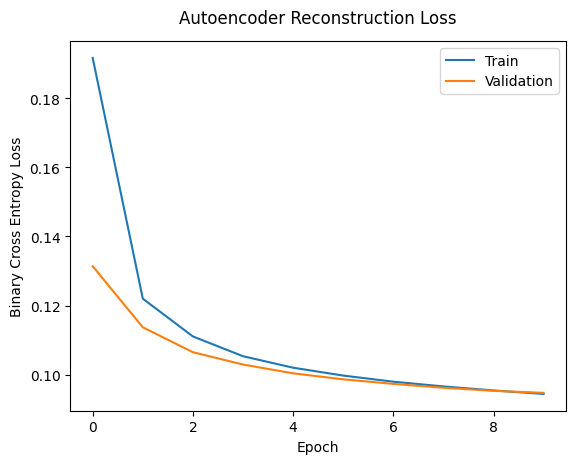

In [7]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

# Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 5ms/step


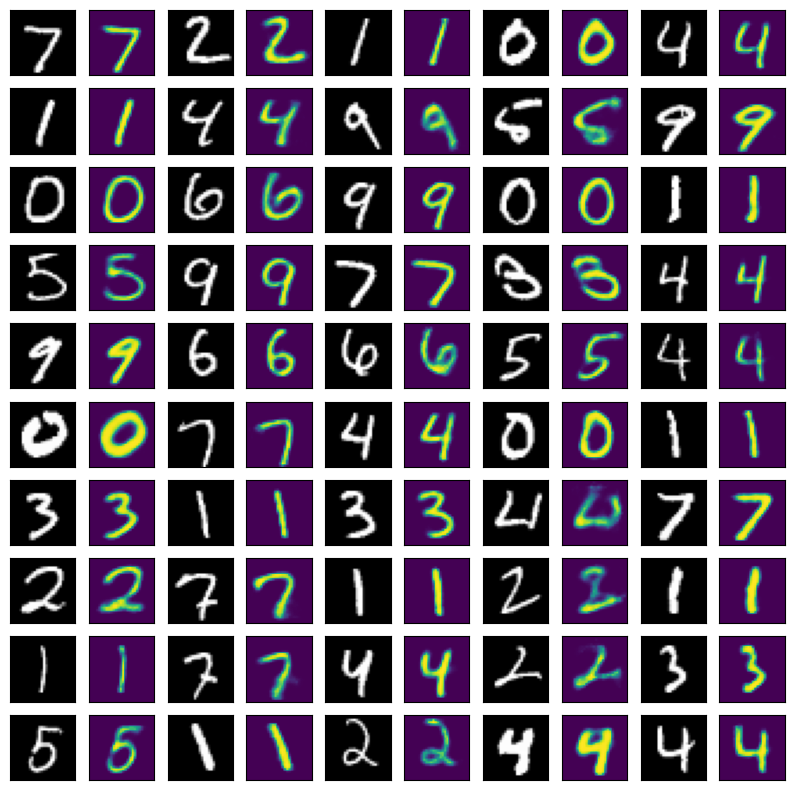

In [8]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 25ms/step
(1, 784)


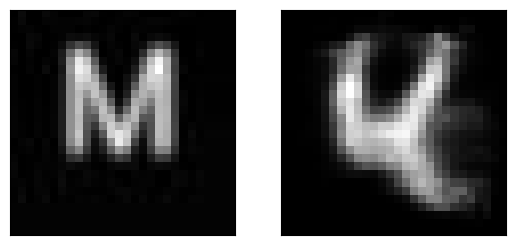

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media1.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


In [ ]:
autoencoder.save('/content/drive/MyDrive/Autoencoders/initially_trained_autoencoder.h5')

# 3.Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character).

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the MNIST data set normalizing and reshaping it

In [13]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# Loading my all 5 images and normaliizng reshaping and storing in new_images numpy array

In [16]:
# Define target image size and color mode
from tensorflow.keras.preprocessing import image
target_size = (28, 28)
color_mode = "grayscale"
new_images = []
# Load 5 new images and display their predictions
for i in range(1, 6):
    # Load image
    img_path = f"/content/drive/MyDrive/Autoencoders/Media{i}.jpg"
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)

    # Convert image to array and normalize
    input_arr = image.img_to_array(img) / 255
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])
    new_images.append(input_arr.reshape(784))

In [17]:

new_images = np.array(new_images)

# Duplicate new images to match size of MNIST dataset
new_images = np.repeat(new_images, 200, axis=0)


# Adding new images to MNIST data set 

In [18]:
train_images = np.vstack((train_images, new_images))

In [19]:
test_images=np.vstack((test_images,new_images))

In [20]:
# Get random indices for shuffling
random_indices = np.random.permutation(len(train_images))

# Shuffle training and test data
train_images = train_images[random_indices]

In [21]:
# Get random indices for shuffling
random_indices = np.random.permutation(len(test_images))

# Shuffle training and test data
test_images = test_images[random_indices]

# Combined data set shape ( MNIST and new images) train data set

In [35]:
train_images.shape

(61000, 784)

# Combined data set shape (MNIST and new images) test data set

In [36]:
test_images.shape

(11000, 784)

# Traning the autoencoder with new data set ( MNIST + NEW IMAGES)  by creating new model

In [22]:
from tensorflow import keras
updated_model = keras.models.load_model('/content/drive/MyDrive/Autoencoders/initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images,test_images),
    callbacks=[early_stop]
)

Epoch 1/15
477/477 [==============================] - 19s 37ms/step - loss: 0.0943 - val_loss: 0.0972
Epoch 2/15
477/477 [==============================] - 18s 38ms/step - loss: 0.0934 - val_loss: 0.0961
Epoch 3/15
477/477 [==============================] - 19s 39ms/step - loss: 0.0927 - val_loss: 0.0952
Epoch 4/15
477/477 [==============================] - 18s 38ms/step - loss: 0.0921 - val_loss: 0.0948
Epoch 5/15
477/477 [==============================] - 19s 41ms/step - loss: 0.0915 - val_loss: 0.0944
Epoch 6/15
477/477 [==============================] - 19s 40ms/step - loss: 0.0911 - val_loss: 0.0939
Epoch 7/15
477/477 [==============================] - 19s 39ms/step - loss: 0.0908 - val_loss: 0.0941
Epoch 8/15
477/477 [==============================] - 18s 37ms/step - loss: 0.0904 - val_loss: 0.0936
Epoch 9/15
477/477 [==============================] - 18s 37ms/step - loss: 0.0900 - val_loss: 0.0933
Epoch 10/15
477/477 [==============================] - 19s 39ms/step - loss: 0.089

# Reconstructng the data with concatenated data set

344/344 [==============================] - 2s 6ms/step


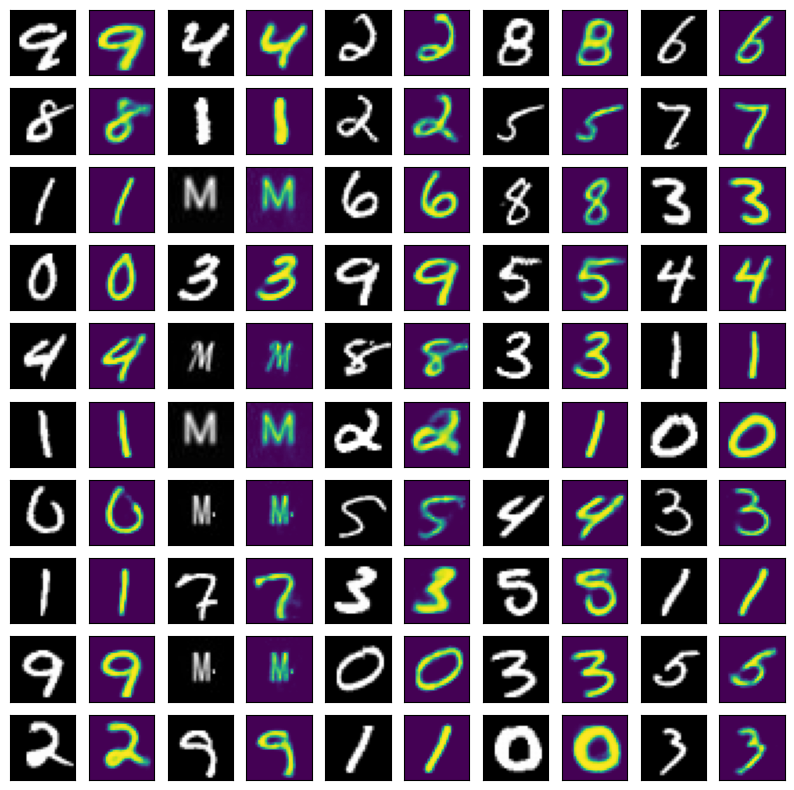

In [25]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(1000):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Testing my new model with my 1st image

1/1 [==============================] - 0s 62ms/step
(1, 784)


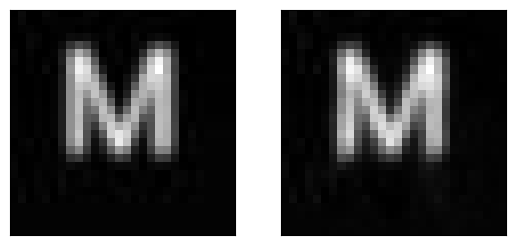

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media1.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing my new model with second image

1/1 [==============================] - 0s 22ms/step
(1, 784)


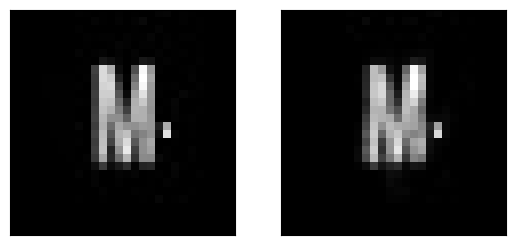

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media2.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing my new model with 3rd image

1/1 [==============================] - 0s 21ms/step
(1, 784)


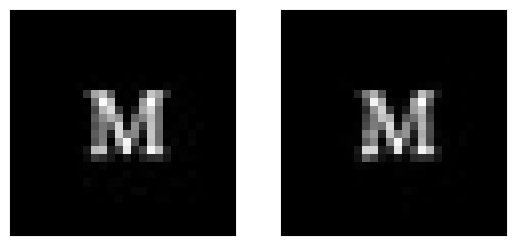

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media3.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing new model with 4th image

1/1 [==============================] - 0s 35ms/step
(1, 784)


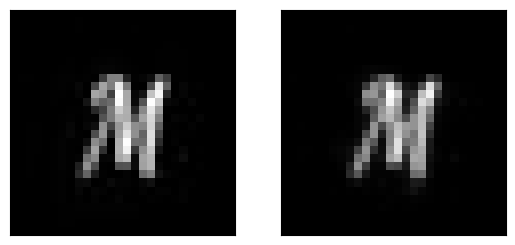

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media4.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing new model with 5th image

1/1 [==============================] - 0s 21ms/step
(1, 784)


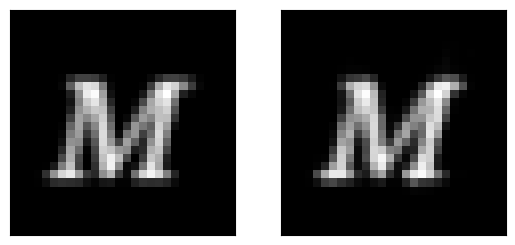

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media5.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Reconstructing my new model with my digits set and also my newimages

344/344 [==============================] - 2s 6ms/step


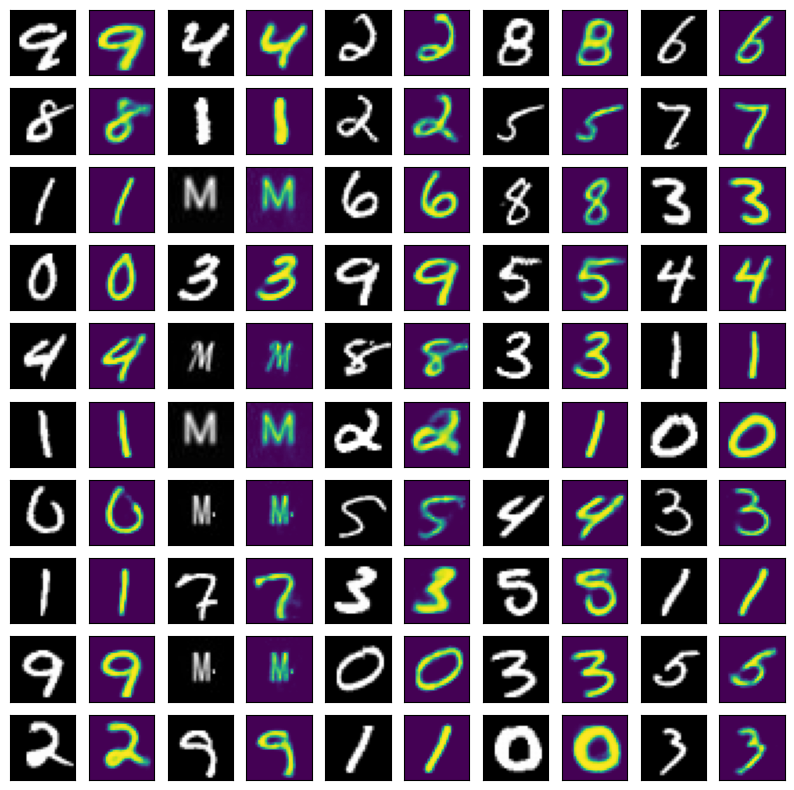

In [31]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Saving my new model ie: updated_model which is trained with both mnist and my new images as it is best model

In [33]:
updated_model.save('/content/drive/MyDrive/Autoencoders/final_new_best_model.h5')